# Sklearn KNeighborsClassifier. K-Nearest Neighbors in Scikit-Learn

By: jcchouinard.com

Original post: https://www.jcchouinard.com/k-nearest-neighbors/

-----

## What is KNeighborsClassifier

The K-Nearest Neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used for both classification and regression tasks. In this video, we will focus on using KNN for classification with Scikit-Learn's KNeighborsClassifier.

![](https://www.jcchouinard.com/wp-content/uploads/2021/08/image-8.png)

##  Example Classifying Breast Cancer Data

In [25]:
# Load Data
import pandas as pd
from sklearn import datasets

dataset = datasets.load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [40]:
# Show features and targets
print('Features:', dataset.feature_names)
print('Targets:', dataset.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [ ]:
# Define independent (features) and dependent (targets) variables
X = dataset['data']
y = dataset['target']

## Data Preparation and Splitting

In [28]:
# split taining and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Training the KNeighborsClassifier


In [30]:
# Import KNN
from sklearn.neighbors import KNeighborsClassifier

# train the model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# compute accuracy of the model
knn.score(X_test, y_test)

0.9298245614035088

## Accuracy vs. Number of Neighbors

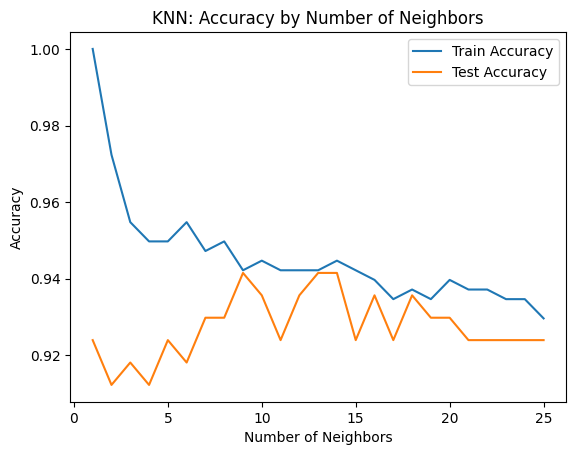

In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

# Define independent (features) and dependent (targets) variables
X = dataset['data']
y = dataset['target']

# split taining and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

train_accs = {}
test_accs = {}

# Range of k values
neighbors = np.arange(1,26) 

for neighbor in neighbors: 
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)

    train_accs[neighbor] = knn.score(X_train, y_train)
    test_accs[neighbor] = knn.score(X_test, y_test)


plt.title('KNN: Accuracy by Number of Neighbors')
plt.plot(neighbors, train_accs.values(), label='Train Accuracy')
plt.plot(neighbors, test_accs.values(), label='Test Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Hyperparameter Tuning with GridSearchCV

In [32]:
# Hyperparameter Tuning
import numpy as np 
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1, 50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 6}
0.9498417721518987


## Evaluating the Model


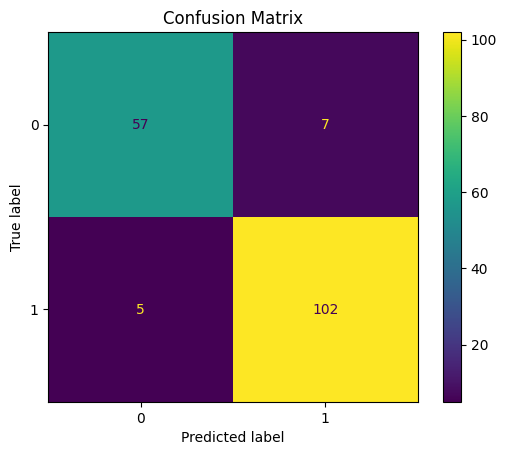

In [34]:
# Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

![](https://www.jcchouinard.com/wp-content/uploads/2021/08/image-16.png)

Confusion Matrix:
https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/ 

- True Positives (TP): 102 instances correctly predicted as class 1 (benign).
- True Negatives (TN): 57 instances correctly predicted as class 0 (malignant).
- False Positives (FP): 7 instances incorrectly predicted as class 1 (benign) when they were actually class 0 (malignant).
- False Negatives (FN): 5 instances incorrectly predicted as class 0 (malignant) when they were actually class 1 (benign).

In [35]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.94      0.95      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



Classification Report: https://www.jcchouinard.com/classification-report-in-scikit-learn/


- Accuracy: Highlight that 93% accuracy means the model is right 93% of the time.
- Precision vs. Recall (Focus on Class 1 - Malignant): in the critical case where we want to correctly predict Cancer, we want precision (correct positive predictions) and recall (all actual positive)
    - precision (correct positive predictions). When we predict Cancer, how often is it really Cancer? 94% of the time. High precision: Not many Benign cancers were predicted as Malignant
    - recall (capturing all actual positives) is 95%. What percentage of the real cancers did we manage to predict? 95%. High recall: Predicted most Cancers.
    
This shows how well the model performs in identifying cancer cases, which is vital for real-world applications.

- True Positive (TP)	Correct positive identification.
- True Negative (TN)	Correct negative identification.
- False Positive (FP)	Incorrect positive identification.
- False Negative (FN)	Incorrect negative identification.

Detailed report
- Precision (Class 0 - benign): Out of all the times the model predicted "benign," it was right 92% of the time.
- Recall (Class 0 - benign): Out of all actual "benign" cases, the model correctly identified 89%.
- F1-score (Class 0 - benign): Combines precision and recall, showing that the model is 90% effective at predicting "benign" cases.
- Precision (Class 1 - malignant): Out of all the times the model predicted "malignant," it was right 94% of the time.

Overall:

- Accuracy: The model got the predictions right 93% of the time.
- Macro Average: Looks at how well the model does for both classes equally, without considering how many cases there are for each class.
- Weighted Average: Takes into account that there may be more cases in one class than the other, giving a balanced view of performance across all instances.

## Feature Scaling

KNN is sensitive to the scale of the data, so it's often a good idea to standardize the data using StandardScaler.

In [37]:
# Scaling features
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 


knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print(np.mean(X), np.std(X))
print(round(np.mean(X_train_scaled)), np.std(X_train_scaled))



61.890712339519624 228.29740508276657
0 1.0


- Original Data: Mean ≈ 61.89, Standard Deviation ≈ 228.30.
- Scaled Data: Mean ≈ 0, Standard Deviation ≈ 1.

## Scaling with Pipelines

In [38]:
# Scaling in Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=6))
]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)

print(pipeline.score(X_test, y_test))


0.9590643274853801


## Conclusion

Help me and subscribe to this channel.

Stay tuned for my upcoming Python for SEO course.

### [jcchouinard.com](https://www.jcchouinard.com/)
### [youtube.com/@jcchouinard](https://www.youtube.com/@jcchouinard)
### [twitter.com/ChouinardJC](https://twitter.com/ChouinardJC)
### [linkedin.com/in/jeanchristophechouinard](https://www.linkedin.com/in/jeanchristophechouinard)
